In [11]:
# sklearn version 0.19.0 or 0.19.1 required
# import sklearn
# sklearn.__version__
# python 3.0 recommended

from __future__ import division, print_function, unicode_literals
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split #from model_selection instead of cross_validation
from sklearn.model_selection import validation_curve #from model_selection instead of learning_curve
from sklearn.model_selection import learning_curve
from sklearn.utils import shuffle

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

certain portion of code was borrowed from "Hands-On Machine Learning with Scikit-Learn and TensorFlow" Book

In [12]:
# To plot pretty figures
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
PROJECT_ID = "classification"
DATASET_ID = "_mnist_"  # for handwritten digits dataset

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, PROJECT_ID + DATASET_ID + fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)
    
def plot_curve(sizes, data, dots=True, **kwargs):
    mu, std = data.mean(1), data.std(1)
    if dots:
        lines = plt.plot(sizes, mu, 'o-', **kwargs)
    else:
        lines = plt.plot(sizes, mu, '-', **kwargs)
    plt.fill_between(sizes, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.3)
    
def normalize_data(df, columns):
    for column in columns:
        mean_value = df.loc[:,column].mean()
        stdev = np.std(df.loc[:,column].values)
        df.loc[:,column] = (df.loc[:,column] - mean_value) / stdev
    return df

# Sklearn Handwritten Digits Data (originally from UCI)
http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits

In [13]:
import pickle, gzip, numpy, urllib.request, json

# Load the dataset
urllib.request.urlretrieve("http://deeplearning.net/data/mnist/mnist.pkl.gz", "mnist.pkl.gz")
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

In [14]:
X = train_set[0]
y = train_set[1]
index = np.array(range(X.shape[0]))%20==0

In [15]:
X = X[index, :]
y = y[index]


#shuffle data
X, y = shuffle(X, y, random_state=23)

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [16]:
print (X.shape)

(2500, 784)


([<matplotlib.axis.XTick at 0x19152804860>,
 <a list of 10 Text xticklabel objects>)

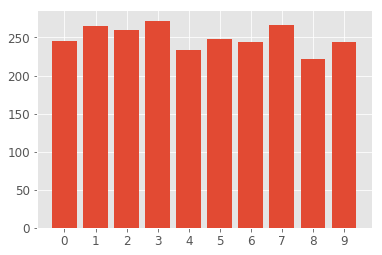

In [17]:
unique, counts = np.unique(y, return_counts=True)
plt.bar(unique, counts)
plt.xticks(unique, ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9'))

# DecisionTreeClassifier

Saving figure Decision Tree Complexity Curve (max_depth)


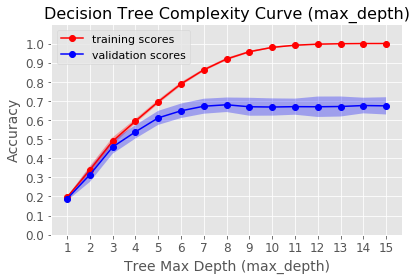

In [18]:
def plot_complexity_curve_dt():
    param_name="max_depth"
    param_range=range(1,16)
    val_train, val_test = validation_curve(DecisionTreeClassifier(random_state=0),
                                           X_train, y_train, 
                                           param_name=param_name, param_range=param_range, cv=10)
    #print (val_train)
    plot_curve(param_range, val_train, label='training scores', color = 'r')
    plot_curve(param_range, val_test, label='validation scores', color = 'b')
    lower = 0; upper = 1; interval = 0.1
    ytick_range = np.arange(lower, upper+interval, interval)
    plt.ylim(lower, upper+interval)
    plt.yticks(ytick_range)
    plt.xticks(param_range)
    plt.xlabel('Tree Max Depth (max_depth)'); plt.ylabel('Accuracy')
    plt.title('Decision Tree Complexity Curve (max_depth)', fontsize=16)
    plt.legend(fontsize = 11)
    #plt.grid()
    save_fig('Decision Tree Complexity Curve (max_depth)', tight_layout=True)
    
plot_complexity_curve_dt()

Saving figure Decision Tree Learning Curve


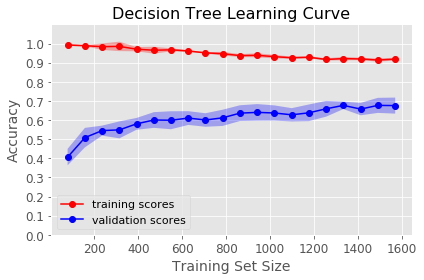

In [19]:
def plot_learning_curve_dt():
    train_sizes = np.linspace(0.05, 1, 20)
    N_train, val_train, val_test = learning_curve(DecisionTreeClassifier(max_depth=8),
                                                  X_train, y_train, train_sizes=train_sizes, cv=10)
    plot_curve(N_train, val_train, label='training scores', color = 'r')
    plot_curve(N_train, val_test, label='validation scores', color = 'b')
    lower = 0; upper = 1; interval = 0.1
    ytick_range = np.arange(lower, upper+interval, interval)
    plt.ylim(lower, upper+interval)
    plt.yticks(ytick_range)
    plt.xlabel('Training Set Size'); plt.ylabel('Accuracy')
    plt.title('Decision Tree Learning Curve', fontsize=16)
    plt.legend(fontsize = 11)
    #plt.grid()
    save_fig('Decision Tree Learning Curve', tight_layout=True)
    
plot_learning_curve_dt()

In [ ]:
dt_clf = DecisionTreeClassifier(max_depth = 8, random_state=0)
dt_clf.fit(X_train, y_train)
test_score = dt_clf.score(X_test, y_test)
print ('Decision Tree Model Prediction Accuracy on Test Data: {:.4f}'.format(test_score))

Decision Tree Model Prediction Accuracy on Test Data: 0.6747


# MLPClassifier

In [ ]:
# first to test on one layer only
def plot_complexity_curve_mlp():
    param_name="hidden_layer_sizes"
    param_range=range(1,41)
    val_train, val_test = validation_curve(MLPClassifier(solver='lbfgs', random_state=0),
                                           X_train, y_train,
                                           param_name=param_name, param_range=param_range, cv=10)
    plot_curve(param_range, val_train, dots = False, label='training scores', color = 'r')
    plot_curve(param_range, val_test, dots = False, label='validation scores', color = 'b')
    lower = 0; upper = 1; interval = 0.1
    ytick_range = np.arange(lower, upper+interval, interval)
    plt.ylim(lower, upper+interval)
    plt.yticks(ytick_range)
    plt.xlabel('Hidden Layer (One Layer) Sizes'); plt.ylabel('Accuracy')
    plt.title('MLP Complexity Curve 1 (hidden_layer_sizes)', fontsize=16)
    plt.legend(fontsize = 11)
    #plt.grid()
    save_fig('MLP Complexity Curve 1 (hidden_layer_sizes)', tight_layout=True)
    
plot_complexity_curve_mlp()

In [ ]:
def plot_complexity_curve_mlp2():
    val_train_result = [np.array([])]
    val_train_std = np.array([])
    val_test_result = np.array([])
    val_test_std = np.array([])
    sizes = [(30,), (30, 30), (30, 30, 30), (30, 30, 30, 30), (30, 30, 30, 30, 30)]
    for i in sizes:
        clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes = i, random_state=0)
        results = cross_validate(clf, X_train, y_train, cv=10, return_train_score=True)

        val_train_result = np.append(val_train_result, results['train_score'].mean())
        val_test_result = np.append(val_test_result, results['test_score'].mean())
        val_train_std = np.append(val_train_std, results['train_score'].std())
        val_test_std = np.append(val_test_std, results['test_score'].std())                     
        
    lines1 = plt.plot(range(1,6),val_train_result , 'o-', color = 'r', label='training scores')
    lines2 = plt.plot(range(1,6),val_test_result , 'o-', color = 'b', label='test scores')

    plt.fill_between(range(1,6), val_train_result - val_train_std, val_train_result + val_train_std, edgecolor='none',
                     facecolor=lines1[0].get_color(), alpha=0.3)
    plt.fill_between(range(1,6), val_test_result - val_test_std, val_test_result + val_test_std, edgecolor='none',
                     facecolor=lines2[0].get_color(), alpha=0.3)
    lower = 0.8; upper = 1; interval = 0.05
    ytick_range = np.arange(lower, upper+interval, interval)
    plt.ylim(lower, upper+interval)
    plt.yticks(ytick_range)
    plt.xticks(range(1, 6))
    plt.xlabel('Number of Hidden Layers'); plt.ylabel('Accuracy')
    plt.title('MLP Complexity Curve 2 (hidden_layer numbers)', fontsize=16)    
    plt.legend(fontsize = 11)
    #plt.grid()
    save_fig('MLP Complexity Curve 2 (hidden_layer numbers)', tight_layout=True)
    
plot_complexity_curve_mlp2()

In [ ]:
def plot_complexity_curve_mlp3():
    param_name="max_iter"
    param_range=range(10, 200, 10)
    val_train, val_test = validation_curve(MLPClassifier(solver='lbfgs', hidden_layer_sizes=30, random_state=0),
                                           X_train, y_train,
                                           param_name=param_name, param_range=param_range, cv=10)
    plot_curve(param_range, val_train, label='training scores', color = 'r')
    plot_curve(param_range, val_test, label='validation scores', color = 'b')
    lower = 0.5; upper = 1; interval = 0.05
    ytick_range = np.arange(lower, upper+interval, interval)
    plt.ylim(lower, upper+interval)
    plt.yticks(ytick_range)
    plt.xlabel('Max Iterations (max_iter)'); plt.ylabel('Accuracy')
    plt.title('MLP Complexity Curve 3 (max_iter)', fontsize=16)
    plt.legend(fontsize=11)
    #plt.grid()
    save_fig('MLP Complexity Curve 3 (max_iter)', tight_layout=True)

plot_complexity_curve_mlp3()

In [ ]:
def plot_complexity_curve_mlp4():
    param_name="alpha"
    param_range=[1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 10, 100]
    val_train, val_test = validation_curve(MLPClassifier(solver='lbfgs', hidden_layer_sizes=30, 
                                                         max_iter = 100, random_state=0),
                                           X_train, y_train,
                                           param_name=param_name, param_range=param_range, cv=10)
    plot_curve(np.log10(param_range), val_train, label='training scores', color = 'r')
    plot_curve(np.log10(param_range), val_test, label='validation scores', color = 'b')
    lower = 0.8; upper = 1; interval = 0.05
    ytick_range = np.arange(lower, upper+interval, interval)
    plt.ylim(lower, upper+interval)
    plt.yticks(ytick_range)
    plt.xlabel('LOG10(alpha)'); plt.ylabel('Accuracy')
    plt.title('MLP Complexity Curve 4 (alpha)', fontsize=16)
    plt.legend(fontsize=11)
    #plt.grid()
    save_fig('MLP Complexity Curve 4 (alpha)', tight_layout=True)
    
plot_complexity_curve_mlp4()

In [ ]:
def plot_learning_curve():
    train_sizes = np.linspace(0.05, 1, 20) # if the train size is too small, training sample may only contain one class
    N_train, val_train, val_test = learning_curve(MLPClassifier(solver='lbfgs', alpha=1e-5, 
                                                                hidden_layer_sizes=30, max_iter = 100, random_state=0),
                                                  X_train, y_train, train_sizes=train_sizes, cv=10)
    plot_curve(N_train, val_train, label='training scores', color = 'r')
    plot_curve(N_train, val_test, label='validation scores', color = 'b')
    lower = 0.5; upper = 1; interval = 0.05
    ytick_range = np.arange(lower, upper+interval, interval)
    plt.ylim(lower, upper+interval)
    plt.yticks(ytick_range)
    plt.xlabel('Training Set Size'); plt.ylabel('Accuracy')
    plt.title('MLP Learning Curve 1 (relu)', fontsize=16)
    plt.legend(fontsize=11)
    #plt.grid()
    save_fig('MLP Learning Curve 1 (relu)', tight_layout=True)
    
plot_learning_curve()

In [ ]:
def plot_learning_curve_mlp2():
    train_sizes = np.linspace(0.05, 1, 20) 
    # if the train size is too small, training sample may only contain one class
    N_train, val_train, val_test = learning_curve(MLPClassifier(solver='lbfgs', alpha=1e-5, 
                        hidden_layer_sizes=30, max_iter = 100, activation = 'logistic',random_state=1),
                                                  X_train, y_train, train_sizes=train_sizes, cv=10)
    plot_curve(N_train, val_train, label='training scores', color = 'r')
    plot_curve(N_train, val_test, label='validation scores', color = 'b')
    lower = 0.5; upper = 1; interval = 0.05
    ytick_range = np.arange(lower, upper+interval, interval)
    plt.ylim(lower, upper+interval)
    plt.yticks(ytick_range)
    plt.xlabel('Training Set Size'); plt.ylabel('Accuracy')
    plt.title('MLP Learning Curve 2 (logistic)', fontsize=16)
    plt.legend(fontsize=11)
    #plt.grid()
    save_fig('MLP Learning Curve 2 (logistic)', tight_layout=True)
    
plot_learning_curve_mlp2()

In [ ]:
# mlp_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, 
#                         hidden_layer_sizes=(10, 2), max_iter = 200,random_state=0)
mlp_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, 
                        hidden_layer_sizes=30, max_iter = 100,random_state=0)
mlp_clf.fit(X_train, y_train)
test_score = mlp_clf.score(X_test, y_test)
print ('ANN Model Prediction Accuracy on Test Data: {:.4f}'.format(test_score))

In [ ]:
# mlp_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, 
#                         hidden_layer_sizes=(10, 2), max_iter = 200,random_state=0)
mlp_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, 
                        hidden_layer_sizes=30, max_iter = 100,activation = 'logistic', random_state=0)
mlp_clf.fit(X_train, y_train)
test_score = mlp_clf.score(X_test, y_test)
print ('ANN Model Prediction Accuracy on Test Data: {:.4f}'.format(test_score))

# AdaBoostClassifier

In [ ]:
def plot_complexity_curve_bdt1():
    val_train_result = [np.array([])]
    val_train_std = np.array([])
    val_test_result = np.array([])
    val_test_std = np.array([])
    sizes = range(1, 16)
    for i in sizes:
        clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=i),learning_rate=1,algorithm="SAMME")
        results = cross_validate(clf, X_train, y_train, cv=10, return_train_score = True)

        val_train_result = np.append(val_train_result, results['train_score'].mean())
        val_test_result = np.append(val_test_result, results['test_score'].mean())
        val_train_std = np.append(val_train_std, results['train_score'].std())
        val_test_std = np.append(val_test_std, results['test_score'].std())                     
        
    lines1 = plt.plot(sizes,val_train_result , 'o-', color = 'r', label='training scores')
    lines2 = plt.plot(sizes,val_test_result , 'o-', color = 'b', label='test scores')

    plt.fill_between(sizes, val_train_result - val_train_std, val_train_result + val_train_std, edgecolor='none',
                     facecolor=lines1[0].get_color(), alpha=0.3)
    plt.fill_between(sizes, val_test_result - val_test_std, val_test_result + val_test_std, edgecolor='none',
                     facecolor=lines2[0].get_color(), alpha=0.3)
    lower = 0.5; upper = 1; interval = 0.05
    ytick_range = np.arange(lower, upper+interval, interval)
    plt.ylim(lower, upper+interval)
    plt.yticks(ytick_range)
    plt.xlabel('Max Depth of DecisionTreeClassifier'); plt.ylabel('Accuracy')
    plt.title('AdaBoost Complexity Curve 1 (Tree max_depth)', fontsize=16)    
    plt.legend(fontsize = 11)
    #plt.grid()
    save_fig('AdaBoost Complexity Curve 1 (Tree max_depth)', tight_layout=True)
    
plot_complexity_curve_bdt1()

In [ ]:
def plot_complexity_curve_bdt2():
    #train_sizes = np.linspace(0.1, 0.95, 18)
    param_name="n_estimators"
    param_range=range(10, 200, 10)
    val_train, val_test = validation_curve(AdaBoostClassifier(DecisionTreeClassifier(max_depth=8),
                                           learning_rate=1,algorithm="SAMME"),
                                           X_train, y_train, 
                                           param_name=param_name, param_range=param_range, cv=10)
    #print (val_train)
    plot_curve(param_range, val_train, label='training scores', color = 'r')
    plot_curve(param_range, val_test, label='validation scores', color = 'b')
    lower = 0.8; upper = 1; interval = 0.05
    ytick_range = np.arange(lower, upper+interval, interval)
    plt.ylim(lower, upper+interval)
    plt.yticks(ytick_range)
    plt.xlabel('Number of Estimators (n_estimators)'); plt.ylabel('Accuracy')
    plt.title('AdaBoost Complexity Curve 2 (n_estimators)', fontsize=16)    
    plt.legend(fontsize = 11)
    #plt.grid()
    save_fig('AdaBoost Complexity Curve 2 (n_estimators)', tight_layout=True)
    
plot_complexity_curve_bdt2()

In [ ]:
def plot_learning_curve_bdt():
    train_sizes = np.linspace(0.05, 1, 20) # if the train size is too small, training sample may only contain one class
    N_train, val_train, val_test = learning_curve(AdaBoostClassifier(DecisionTreeClassifier(max_depth=8),
                                                                     n_estimators=100,learning_rate=1,algorithm="SAMME"),
                                                  X_train, y_train, train_sizes=train_sizes, cv=10)
    plot_curve(N_train, val_train, label='training scores', color = 'r')
    plot_curve(N_train, val_test, label='validation scores', color = 'b')
    ytick_range = np.arange(0.5, 1.05, 0.05)
    lower = 0.5; upper = 1; interval = 0.05
    ytick_range = np.arange(lower, upper+interval, interval)
    plt.ylim(lower, upper+interval)
    plt.yticks(ytick_range)
    plt.xlabel('Training Set Size'); plt.ylabel('Accuracy')
    plt.title('AdaBoost Learning Curve 1', fontsize=16)    
    plt.legend(fontsize = 11)
    #plt.grid()
    save_fig('AdaBoost Learning Curve 1', tight_layout=True)
    
plot_learning_curve_bdt()

In [ ]:
def plot_learning_curve_bdt2():
    train_sizes = np.linspace(0.05, 1, 20) # if the train size is too small, training sample may only contain one class
    N_train, val_train, val_test = learning_curve(AdaBoostClassifier(DecisionTreeClassifier(max_depth=8),
                                                                     n_estimators=100,learning_rate=0.1,algorithm="SAMME"),
                                                  X_train, y_train, train_sizes=train_sizes, cv=10)
    plot_curve(N_train, val_train, label='training scores', color = 'r')
    plot_curve(N_train, val_test, label='validation scores', color = 'b')
    ytick_range = np.arange(0.5, 1.05, 0.05)
    lower = 0.5; upper = 1; interval = 0.05
    ytick_range = np.arange(lower, upper+interval, interval)
    plt.ylim(lower, upper+interval)
    plt.yticks(ytick_range)
    plt.xlabel('Training Set Size'); plt.ylabel('Accuracy')
    plt.title('AdaBoost Learning Curve 2 (smaller learning rate)', fontsize=16)    
    plt.legend(fontsize = 11)
    #plt.grid()
    save_fig('AdaBoost Learning Curve 2 (smaller learning rate)', tight_layout=True)
    
plot_learning_curve_bdt2()

In [ ]:
np.arange(0.5, 1.1, 0.05)

In [ ]:
bdt_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=8),
    n_estimators=100,
    learning_rate=1,
    algorithm="SAMME")
bdt_clf.fit(X_train, y_train)
test_score = bdt_clf.score(X_test, y_test)
print ('AdaBoost Model Prediction Accuracy on Test Data: {:.4f}'.format(test_score))

In [ ]:
bdt_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=8),
    n_estimators=100,
    learning_rate=0.1,
    algorithm="SAMME")
bdt_clf.fit(X_train, y_train)
test_score = bdt_clf.score(X_test, y_test)
print ('AdaBoost Model Prediction Accuracy on Test Data: {:.4f}'.format(test_score))

# SVC

In [ ]:
# svm_clf = SVC(kernel='linear', C=1)
# svm_clf.fit(X, y)

In [ ]:
def plot_complexity_curve_svm1():
    #train_sizes = np.linspace(0.1, 0.95, 18)
    param_name="C"
    param_range=[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
    val_train, val_test = validation_curve(SVC(kernel= 'rbf'),
                                           X_train, y_train, 
                                           param_name=param_name, param_range=param_range, cv=10)
    #print (val_train)
    plot_curve(np.log10(param_range), val_train, label='training scores', color = 'r')
    plot_curve(np.log10(param_range), val_test, label='validation scores', color = 'b')
    lower = 0; upper = 1; interval = 0.1
    ytick_range = np.arange(lower, upper+interval, interval)
    plt.ylim(lower, upper+interval)
    plt.yticks(ytick_range)
    plt.xlabel('log10(C)'); plt.ylabel('Accuracy')
    plt.title('SVC Complexity Curve (rbf) 1 (C)', fontsize=16)
    plt.legend(fontsize = 11)
    #plt.grid()
    save_fig('SVC Complexity Curve (rbf) 1 (C)', tight_layout=True)
    
plot_complexity_curve_svm1()

In [ ]:
np.arange(0.1, 1.1, 0.1)

In [ ]:
def plot_complexity_curve_svm2():
    #train_sizes = np.linspace(0.1, 0.95, 18)
    param_name="gamma"
    param_range=[0.000001, 0.000003, 0.00001, 0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1]
    val_train, val_test = validation_curve(SVC(kernel= 'rbf', C = 1),
                                           X_train, y_train, 
                                           param_name=param_name, param_range=param_range, cv=10)
    #print (val_train)
    plot_curve(np.log10(param_range), val_train, label='training scores', color = 'r')
    plot_curve(np.log10(param_range), val_test, label='validation scores', color = 'b')
    lower = 0; upper = 1; interval = 0.1
    ytick_range = np.arange(lower, upper+interval, interval)
    plt.ylim(lower, upper+interval)
    plt.yticks(ytick_range)
    plt.xlabel('log10(gamma)'); plt.ylabel('Accuracy')
    plt.title('SVC Complexity Curve (rbf) 2 (gamma)', fontsize=16)
    plt.legend(fontsize = 11)
    #plt.grid()
    save_fig('SVC Complexity Curve (rbf) 2 (gamma)', tight_layout=True)
    
plot_complexity_curve_svm2()

In [ ]:
def plot_complexity_curve_svm3():
    #train_sizes = np.linspace(0.1, 0.95, 18)
    param_name="C"
    param_range=[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
    val_train, val_test = validation_curve(SVC(kernel= 'rbf', gamma = 0.001),
                                           X_train, y_train, 
                                           param_name=param_name, param_range=param_range, cv=10)
    #print (val_train)
    plot_curve(np.log10(param_range), val_train, label='training scores', color = 'r')
    plot_curve(np.log10(param_range), val_test, label='validation scores', color = 'b')
    lower = 0; upper = 1; interval = 0.1
    ytick_range = np.arange(lower, upper+interval, interval)
    plt.ylim(lower, upper+interval)
    plt.yticks(ytick_range)
    plt.xlabel('log10(C)'); plt.ylabel('Accuracy')
    plt.title('SVC Complexity Curve (rbf) 3 (C)', fontsize=16)
    plt.legend(fontsize = 11)
    #plt.grid()
    save_fig('SVC Complexity Curve (rbf) 3 (C)', tight_layout=True)
    
plot_complexity_curve_svm3()

In [ ]:
def plot_learning_curve_svm1():
    train_sizes = np.linspace(0.05, 1, 20) # if the train size is too small, training sample may only contain one class
    N_train, val_train, val_test = learning_curve(SVC(kernel= 'rbf', C = 10, gamma = 0.001),
                                                  X_train, y_train, train_sizes=train_sizes, cv=10)
    plot_curve(N_train, val_train, label='training scores', color = 'r')
    plot_curve(N_train, val_test, label='validation scores', color = 'b')
    lower = 0.5; upper = 1; interval = 0.05
    ytick_range = np.arange(lower, upper+interval, interval)
    plt.ylim(lower, upper+interval)
    plt.yticks(ytick_range)
    plt.xlabel('Training Set Size'); plt.ylabel('Accuracy')
    plt.title('SVC Learning Curve (rbf)', fontsize=16)
    plt.legend(fontsize = 11)
    #plt.grid()
    save_fig('SVC Learning Curve (rbf)', tight_layout=True)
    
plot_learning_curve_svm1()

In [ ]:
def plot_complexity_curve_svm4():
    param_name="degree"
    param_range=range(1, 16)
    val_train, val_test = validation_curve(SVC(kernel= 'poly'),
                                           X_train, y_train, 
                                           param_name=param_name, param_range=param_range, cv=10)
    plot_curve(param_range, val_train, label='training scores', color = 'r')
    plot_curve(param_range, val_test, label='validation scores', color = 'b')
    lower = 0.8; upper = 1; interval = 0.05
    ytick_range = np.arange(lower, upper+interval, interval)
    plt.ylim(lower, upper+interval)
    plt.yticks(ytick_range)
    plt.xlabel('degree'); plt.ylabel('Accuracy')
    plt.title('SVC Complexity Curve (poly) 1 (degree)', fontsize=16)
    plt.legend(fontsize = 11)
    #plt.grid()
    save_fig('SVC Complexity Curve (poly) 1 (degree)', tight_layout=True)
    
plot_complexity_curve_svm4()

In [ ]:
def plot_complexity_curve_svm5():
    param_name="C"
    param_range=[0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
    val_train, val_test = validation_curve(SVC(kernel= 'poly', degree = 2),
                                           X_train, y_train, 
                                           param_name=param_name, param_range=param_range, cv=10)
    plot_curve(np.log10(param_range), val_train, label='training scores', color = 'r')
    plot_curve(np.log10(param_range), val_test, label='validation scores', color = 'b')
    lower = 0.9; upper = 1; interval = 0.02
    ytick_range = np.arange(lower, upper+interval, interval)
    plt.ylim(lower, upper+interval)
    plt.yticks(ytick_range)
    plt.xlabel('log10(C)'); plt.ylabel('Accuracy')
    plt.title('SVC Complexity Curve (poly) 2 (C)', fontsize=16)
    plt.legend(fontsize = 11)
    #plt.grid()
    save_fig('SVC Complexity Curve (poly) 2 (C)', tight_layout=True)
    
plot_complexity_curve_svm5()

In [ ]:
def plot_complexity_curve_svm6():
    #train_sizes = np.linspace(0.1, 0.95, 18)
    param_name="gamma"
    param_range=[0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3]
    val_train, val_test = validation_curve(SVC(kernel= 'poly', C = 1, degree = 2),
                                           X_train, y_train, 
                                           param_name=param_name, param_range=param_range, cv=10)
    #print (val_train)
    plot_curve(np.log10(param_range), val_train, label='training scores', color = 'r')
    plot_curve(np.log10(param_range), val_test, label='validation scores', color = 'b')
    lower = 0.9; upper = 1; interval = 0.02
    ytick_range = np.arange(lower, upper+interval, interval)
    plt.ylim(lower, upper+interval)
    plt.yticks(ytick_range)
    plt.xticks(range(-4, 1))
    plt.xlabel('log10(gamma)'); plt.ylabel('Accuracy')
    plt.title('SVC Complexity Curve (poly) 3 (gamma)', fontsize=16)
    plt.legend(fontsize = 11)
    #plt.grid()
    save_fig('SVC Complexity Curve (poly) 3 (gamma)', tight_layout=True)
    
plot_complexity_curve_svm6()

In [ ]:
def plot_learning_curve_svm2():
    train_sizes = np.linspace(0.05, 1, 20) 
    # if the train size is too small, training sample may only contain one class
    N_train, val_train, val_test = learning_curve(SVC(kernel= 'poly', C = 1, degree = 2, gamma = 0.01),
                                                  X_train, y_train, train_sizes=train_sizes, cv=10)
    plot_curve(N_train, val_train, label='training scores', color = 'r')
    plot_curve(N_train, val_test, label='validation scores', color = 'b')
    lower = 0.5; upper = 1; interval = 0.05
    ytick_range = np.arange(lower, upper+interval, interval)
    plt.ylim(lower, upper+interval)
    plt.yticks(ytick_range)
    plt.xlabel('Training Set Size'); plt.ylabel('Accuracy')
    plt.title('SVC Learning Curve (poly)', fontsize=16)
    plt.legend(fontsize = 11)
    #plt.grid()
    save_fig('SVC Learning Curve (poly)', tight_layout=True)
    
plot_learning_curve_svm2()

In [ ]:
# svm_clf = SVC(kernel='linear', C=1)
#svm_clf = SVC(kernel='rbf', C=100, gamma='auto')
svm_clf = SVC(kernel='rbf', C=1, gamma=0.001)
svm_clf.fit(X_train, y_train)
test_score = svm_clf.score(X_test, y_test)
print ('SVM Model Prediction Accuracy on Test Data: {:.4f}'.format(test_score))

In [ ]:
# svm_clf = SVC(kernel='linear', C=1)
#svm_clf = SVC(kernel='rbf', C=100, gamma='auto')
svm_clf = SVC(kernel='poly', C=10, gamma=0.01, degree = 2)
svm_clf.fit(X_train, y_train)
test_score = svm_clf.score(X_test, y_test)
print ('SVM Model Prediction Accuracy on Test Data: {:.4f}'.format(test_score))

# KNN

In [ ]:
def plot_complexity_curve_knn():
    #train_sizes = np.linspace(0.1, 0.95, 18)
    param_name="n_neighbors"
    param_range=range(1, 25)
    val_train, val_test = validation_curve(KNeighborsClassifier(),
                                           X_train, y_train, 
                                           param_name=param_name, param_range=param_range, cv=10)
    #print (val_train)
    plot_curve(param_range, val_train, label='training scores', color = 'r')
    plot_curve(param_range, val_test, label='validation scores', color = 'b')
    lower = 0.8; upper = 1; interval = 0.05
    ytick_range = np.arange(lower, upper+interval, interval)
    plt.ylim(lower, upper+interval)
    plt.yticks(ytick_range)
    plt.xlabel('Number of Neighbors (n_neighbors)'); plt.ylabel('Accuracy')
    plt.title('KNN Complexity Curve (n_neighbors)', fontsize=16)
    plt.legend(fontsize = 11)
    #plt.grid()
    save_fig('KNN Complexity Curve (n_neighbors)', tight_layout=True)
    
plot_complexity_curve_knn()

In [ ]:
def plot_learning_curve_knn():
    train_sizes = np.linspace(0.05, 1, 20) # if the train size is too small, training sample may only contain one class
    N_train, val_train, val_test = learning_curve(KNeighborsClassifier(n_neighbors=1),
                                                  X_train, y_train, train_sizes=train_sizes, cv=10)
    plot_curve(N_train, val_train, label='training scores', color = 'r')
    plot_curve(N_train, val_test, label='validation scores', color = 'b')
    lower = 0.5; upper = 1; interval = 0.05
    ytick_range = np.arange(lower, upper+interval, interval)
    plt.ylim(lower, upper+interval)
    plt.yticks(ytick_range)
    plt.xlabel('Training Set Size'); plt.ylabel('Accuracy')
    plt.title('KNN Learning Curve', fontsize=16)
    plt.legend(fontsize = 11)
    #plt.grid()
    save_fig('KNN Learning Curve', tight_layout=True)
    
plot_learning_curve_knn()

In [ ]:
def plot_learning_curve_knn():
    train_sizes = np.linspace(0.05, 1, 20) # if the train size is too small, training sample may only contain one class
    N_train, val_train, val_test = learning_curve(KNeighborsClassifier(n_neighbors=1),
                                                  X_train, y_train, train_sizes=train_sizes, scoring = 'average_precision',cv=10)
    plot_curve(N_train, val_train, label='training scores', color = 'r')
    plot_curve(N_train, val_test, label='validation scores', color = 'b')
    lower = 0.5; upper = 1; interval = 0.05
    ytick_range = np.arange(lower, upper+interval, interval)
    plt.ylim(lower, upper+interval)
    plt.yticks(ytick_range)
    plt.xlabel('Training Set Size'); plt.ylabel('average_precision')
    plt.title('KNN Learning Curve', fontsize=16)
    plt.legend(fontsize = 11)
    #plt.grid()
    save_fig('KNN Learning Curve', tight_layout=True)
    
plot_learning_curve_knn()

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(X_train, y_train)
test_score = knn_clf.score(X_test, y_test)
print ('KNN Model Prediction Accuracy on Test Data: {:.4f}'.format(test_score))

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(X_train, y_train)
test_score = knn_clf.score(X_test, y_test)
print ('KNN Model Prediction Accuracy on Test Data: {:.4f}'.format(test_score))